In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
import seaborn as sns


In [2]:
rawdata=pd.read_csv('Used Cars Price.csv')

In [3]:
rawdata.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
rawdata.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
datatemp=rawdata.copy()

In [6]:
datatemp.drop('Model',axis=1)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [12]:
datatemp.dropna(axis=0)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [8]:
datatemp.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [9]:
dataindex=datatemp.reindex()

In [15]:
dataindex

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [11]:
datanormal.isnull().sum()

NameError: name 'datanormal' is not defined

In [16]:
datanormal=dataindex.copy()

In [116]:
datanormal=datanormal.drop('Model',axis=1)

In [117]:
datanormal

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,logprice
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
4338,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
4339,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
4340,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
4341,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [119]:
datanormal.dropna(axis=0)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,logprice
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
4338,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
4339,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
4340,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
4341,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [122]:
datanormal['Price']

KeyError: 'Price'

KeyError: 'Price'

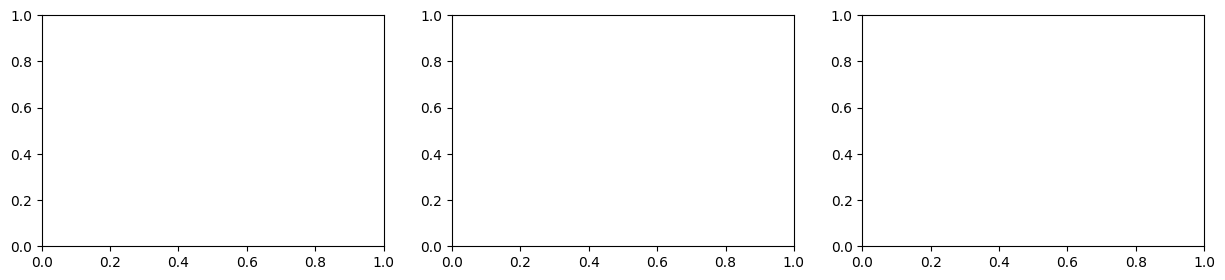

In [123]:
fig,(x1,x2,x3)=plt.subplots(1,3,figsize=(15,3))
x1.scatter(datanormal['Year'],datanormal['Price'])
x2.scatter(datanormal['EngineV'],datanormal['Price'])
x3.scatter(datanormal['Mileage'],datanormal['Price'])

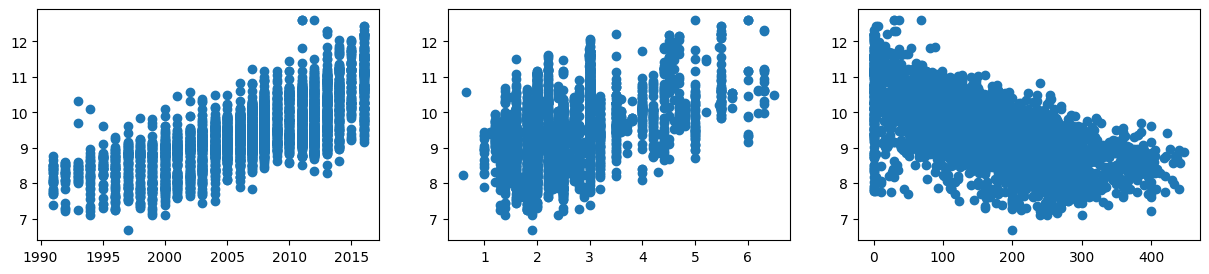

In [124]:
fig,(x1,x2,x3)=plt.subplots(1,3,figsize=(15,3))
x1.scatter(datanormal['Year'],datanormal['logprice'])
x2.scatter(datanormal['EngineV'],datanormal['logprice'])
x3.scatter(datanormal['Mileage'],datanormal['logprice'])

In [125]:
datanormal=datanormal[datanormal['EngineV']<7]

In [126]:
datanormal=datanormal[datanormal['Mileage']<450]

In [127]:
datanormal=datanormal[datanormal['Year']>1990]

In [131]:
logprice=np.log(datanormal['Price'])
datanormal['logprice']=np.log(datanormal['Price'])

KeyError: 'Price'

In [ ]:
#np.log(datanormal[datanormal['Price']>2654])

In [ ]:
datanormal

In [132]:
datanormal=datanormal.drop('Price',axis=1)

KeyError: "['Price'] not found in axis"

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vi 
vidata=datanormal[['Mileage','EngineV','Year']]
vif=pd.DataFrame()
vif['vif']=[vi(vidata,i)for i in range(vidata.shape[1])]
vif['features']=vidata.columns

In [134]:
vidata

,Mileage,EngineV,Year
0,277,2.0,1991
1,427,2.9,1999
2,358,5.0,2003
3,240,4.2,2007
4,120,2.0,2011
...,...,...,...
4338,163,2.5,2008
4339,35,1.6,2014
4340,9,3.0,2014
4341,1,3.5,1999


In [135]:
vif=vif[['features','vif']]

In [136]:
vif

,features,vif
0,Mileage,3.561245
1,EngineV,7.423471
2,Year,10.376618


In [137]:
vidata.values

array([[2.770e+02, 2.000e+00, 1.991e+03],
       [4.270e+02, 2.900e+00, 1.999e+03],
       [3.580e+02, 5.000e+00, 2.003e+03],
       ...,
       [9.000e+00, 3.000e+00, 2.014e+03],
       [1.000e+00, 3.500e+00, 1.999e+03],
       [1.240e+02, 2.000e+00, 2.013e+03]])

In [138]:
datanoraml2=datanormal.copy()

In [139]:
datanormal

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,logprice
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
4338,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
4339,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
4340,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
4341,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


In [140]:
datadummy=pd.get_dummies(datanormal,drop_first=True)

In [143]:
datadummy

,Mileage,EngineV,Year,logprice,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,163,2.5,2008,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,35,1.6,2014,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,9,3.0,2014,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,1,3.5,1999,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [144]:
from sklearn.preprocessing import StandardScaler as st 
from sklearn.model_selection import train_test_split as ts 


In [145]:
datadummy=datadummy.dropna(axis=0)

In [146]:
datadummy.isnull().sum()

Mileage                0
EngineV                0
Year                   0
logprice               0
Brand_BMW              0
Brand_Mercedes-Benz    0
Brand_Mitsubishi       0
Brand_Renault          0
Brand_Toyota           0
Brand_Volkswagen       0
Body_hatch             0
Body_other             0
Body_sedan             0
Body_vagon             0
Body_van               0
Engine Type_Gas        0
Engine Type_Other      0
Engine Type_Petrol     0
Registration_yes       0
dtype: int64

In [147]:
target=datadummy['logprice']
info=datadummy.drop('logprice',axis=1)

In [148]:
scaler =st()
scaler.fit(info)
infoscale =scaler.transform(info)

In [149]:

xtrain,xtest,ytrain,ytest=ts(infoscale,target,random_state=20)

In [150]:
ytrain.isnull().sum()

0

In [151]:
model =lr()

In [152]:
model.fit(xtrain,ytrain)

LinearRegression()

In [154]:
yhat=model.predict(xtrain)

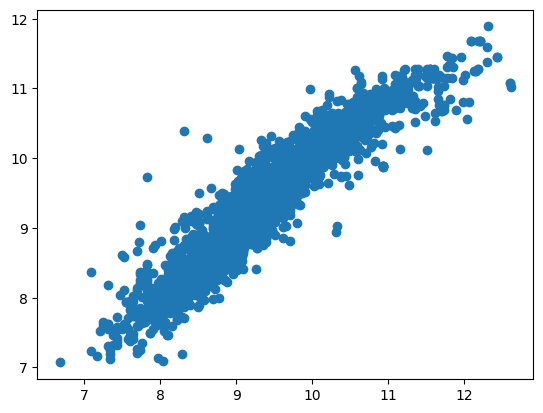

In [155]:
plt.scatter(ytrain,yhat)

In [156]:
model.score(xtrain,ytrain)

0.8819316481531602

In [157]:
val=model.coef_

In [158]:
sumaray=pd.DataFrame(info.columns.values,columns=['Fiture'])
sumaray['val']=val

In [159]:
sumaray

,Fiture,val
0,Mileage,-0.121644
1,EngineV,0.256029
2,Year,0.494455
3,Brand_BMW,0.026401
4,Brand_Mercedes-Benz,0.012506
5,Brand_Mitsubishi,-0.130785
6,Brand_Renault,-0.198231
7,Brand_Toyota,-0.078103
8,Brand_Volkswagen,-0.096585
9,Body_hatch,-0.079116


In [ ]:
modelp=lr()

In [160]:
ytest=ytest.reset_index(drop=True)

In [ ]:
modelp.fit(xtest,ytest)

In [161]:
model.predict(xtest)

array([ 9.88321653,  9.51171938,  9.12808181,  8.56173352, 10.35178004,
        9.8182128 , 10.31145722, 10.2757496 , 10.06072725,  7.88225258,
        8.65270434,  8.11301788,  8.91709372,  8.66767674, 10.26756578,
       10.10073433,  9.53175594,  9.93635105,  8.44279685,  9.14845406,
       10.24103418,  9.72905589, 10.01386359, 10.0020398 ,  8.6001853 ,
       10.93214406, 10.97935212,  8.5350796 ,  9.01101379,  8.37831817,
        8.2687325 ,  9.65486736,  8.49547648,  9.15619769,  8.08131899,
        9.74384589, 10.45342887, 10.22495031,  8.81396016,  9.09240084,
       10.30448857,  9.50856822,  9.63495972,  9.0811383 ,  8.74952192,
       10.39213584,  8.19417228, 10.23325826,  8.06596543,  8.33340706,
        8.61278729, 10.7499573 ,  9.20978803,  9.18537877,  8.45083808,
       10.54683564,  9.1030751 ,  8.77064398,  9.11008484,  9.41689123,
        8.21239098,  9.79847509,  8.37902861,  9.24028811,  9.78858256,
        9.44503361, 10.76909347,  9.42517457,  9.65447151,  9.22

In [162]:
from sklearn.feature_selection import f_regression as f 

In [163]:
select=f(xtrain,ytrain)

In [164]:
select

(array([1.96898925e+03, 7.64271479e+02, 3.39333677e+03, 1.21787646e+01,
        8.99870354e+01, 2.12072624e+01, 1.41867952e+02, 6.03973699e+01,
        3.69337403e+01, 6.22808611e+01, 3.05034800e+00, 5.14563346e+01,
        9.89575205e+01, 5.73439562e+01, 2.26388728e+01, 7.24304071e+00,
        2.50312699e+01, 7.95353220e+02]),
 array([0.00000000e+000, 1.82338708e-149, 0.00000000e+000, 4.90596203e-004,
        4.83488697e-021, 4.30013810e-006, 5.74624495e-032, 1.06909684e-014,
        1.38247681e-009, 4.18980892e-015, 8.08260824e-002, 9.26109289e-013,
        6.00569488e-023, 4.89223518e-014, 2.05089762e-006, 7.15863360e-003,
        5.97846274e-007, 8.68810909e-155]))

In [165]:
fitureselect =pd.DataFrame(info.columns.values,columns=['fiture'])
fitureselect['val']=select2

ValueError: Length of values (2) does not match length of index (18)

In [166]:
select2=np.array([select]).reshape(-1,305)
select2.shape

ValueError: cannot reshape array of size 36 into shape (305)

In [167]:
xtest.shape

(965, 18)

In [168]:
yhattest=model.predict(xtest)

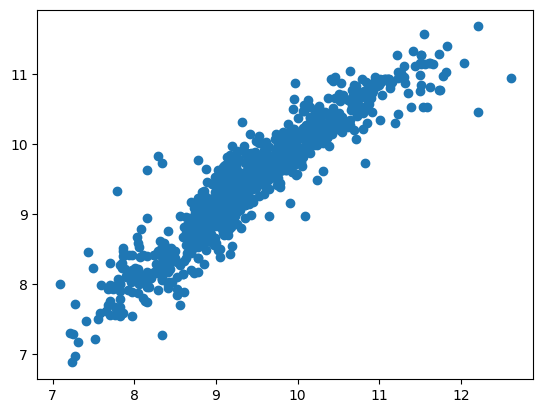

In [169]:
plt.scatter(ytest,yhattest)

ValueError: x and y must be the same size

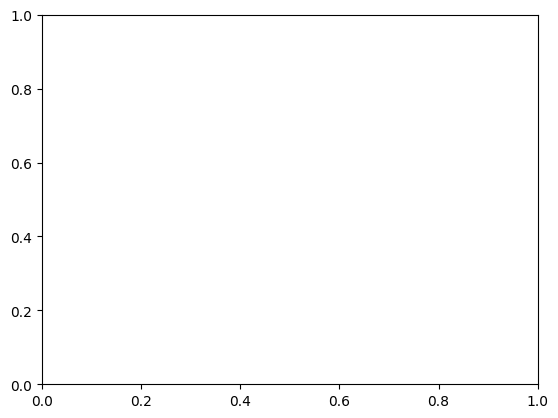

In [170]:
plt.scatter(xtest,ytest)
plt.show()

In [171]:
model.score(xtest,ytest)

0.8762712189422046

In [172]:
defpr=pd.DataFrame(np.exp(yhattest),columns=['predict'])
defpr['target']=np.exp(ytest)


In [173]:
defpr

,predict,target
0,19598.661142,22500.0
1,13517.215529,15900.0
2,9210.337861,11500.0
3,5227.735709,6900.0
4,31312.731296,36000.0
...,...,...
960,20985.541030,21999.0
961,18232.547543,23500.0
962,69572.603095,99999.0
963,9229.672840,11500.0


In [102]:
ytest=ytest.reset_index(drop=True)

In [107]:
defpr

,predict,target
0,23969.958104,22500.0
1,15221.360511,15900.0
2,12350.732377,11500.0
3,6048.729050,6900.0
4,25684.638706,36000.0
...,...,...
960,20947.842874,21999.0
961,22298.862665,23500.0
962,91082.185665,99999.0
963,15513.997902,11500.0


In [180]:
defpr['residual']=defpr['predict']-defpr['target']

In [181]:
defpr['error']=np.absolute(defpr['residual']/defpr['target']*100)

In [182]:
defpr

,predict,target,residual,error
0,19598.661142,22500.0,-2901.338858,12.894839
1,13517.215529,15900.0,-2382.784471,14.986066
2,9210.337861,11500.0,-2289.662139,19.910106
3,5227.735709,6900.0,-1672.264291,24.235714
4,31312.731296,36000.0,-4687.268704,13.020191
...,...,...,...,...
960,20985.541030,21999.0,-1013.458970,4.606841
961,18232.547543,23500.0,-5267.452457,22.414691
962,69572.603095,99999.0,-30426.396905,30.426701
963,9229.672840,11500.0,-2270.327160,19.741975


In [183]:
defpr.describe()

,predict,target,residual,error
count,965.000000,965.000000,965.000000,965.000000
mean,18065.969634,20078.384642,-2012.415009,24.224116
std,15483.932574,24480.056476,14084.297939,30.180640
min,972.028782,1200.000000,-243733.232031,0.006407
25%,7764.639827,7400.000000,-2182.264613,8.570677
50%,13402.700345,11850.000000,-9.622722,17.159181
75%,23511.857426,23300.000000,1891.446233,29.415303
max,118309.730818,300000.000000,31705.399413,372.098416


In [179]:
defpr.sort_values(by=['error'])

KeyError: 'error'

In [113]:
np.round(defpr,3)

,predict,target,residual,error
0,23969.958,22500.0,1469.958,6.533
1,15221.361,15900.0,-678.639,4.268
2,12350.732,11500.0,850.732,7.398
3,6048.729,6900.0,-851.271,12.337
4,25684.639,36000.0,-10315.361,28.654
...,...,...,...,...
960,20947.843,21999.0,-1051.157,4.778
961,22298.863,23500.0,-1201.137,5.111
962,91082.186,99999.0,-8916.814,8.917
963,15513.998,11500.0,4013.998,34.904
